# FACE MASK DETECTION USING CNN

In the following notebook we will be building a face mask detection model using Convolutional Neural Network. 
The dataset used is availabe on kaggle.
The following steps will be performed:

1) Importing the data in zip file and extracting them

2) Creating Labels

3) Performing Image Processing

4) Combining the data sets

5) Train Test Split

6) Model Building

7) Predictive System

# Importing the Data

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#API to fetch face mask dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:06<00:00, 34.7MB/s]
100% 163M/163M [00:06<00:00, 27.8MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3627.jpg', 'with_mask_9.jpg', 'with_mask_1937.jpg', 'with_mask_1524.jpg', 'with_mask_112.jpg']
['with_mask_2919.jpg', 'with_mask_1504.jpg', 'with_mask_528.jpg', 'with_mask_3541.jpg', 'with_mask_82.jpg']


In [9]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2389.jpg', 'without_mask_2284.jpg', 'without_mask_683.jpg', 'without_mask_2018.jpg', 'without_mask_3704.jpg']
['without_mask_2664.jpg', 'without_mask_2436.jpg', 'without_mask_3697.jpg', 'without_mask_1372.jpg', 'without_mask_1013.jpg']


In [10]:
print('Number of mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of mask images: 3725
Number of without mask images: 3828


# Creating labels & Image Processing

Person with mask->1

Person without mask->0

In [12]:
#creating the labels

with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [13]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


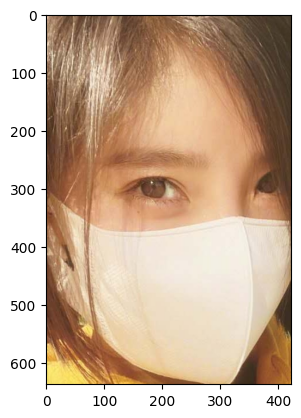

In [24]:
#displaying with mask images
img=mpimg.imread('/content/data/with_mask/with_mask_9.jpg')
imgplt=plt.imshow(img)
plt.show()

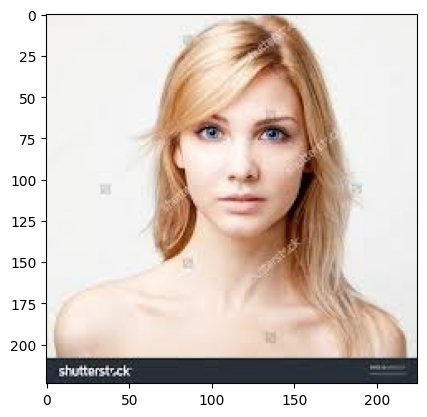

In [27]:
#displaying without mask images
img=mpimg.imread('/content/data/without_mask/without_mask_683.jpg')
imgplt=plt.imshow(img)
plt.show()

In [28]:
#resizing & converting images to numpy array

with_mask_path='/content/data/with_mask/'

data=[]

for img_files in with_mask_files:
   image=Image.open(with_mask_path+img_files)
   image=image.resize((128,128))
   image=image.convert('RGB')
   image=np.array(image)
   data.append(image)


without_mask_path='/content/data/without_mask/'


for img_files in without_mask_files:
   image=Image.open(without_mask_path+img_files)
   image=image.resize((128,128))
   image=image.convert('RGB')
   image=np.array(image)
   data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [29]:
len(data)

7553

In [30]:
type(data)

list

In [31]:
data[2]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[139, 139, 139],
        [149, 149, 149],
        [159, 159, 159],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  1,   0,   2],
        [  3,   0,   0],
        [  1,   0,   0],
        ...,
        [ 98,  80,  65],
        [ 92,  73,  62],
        [108,  88,  78]],

       [[  1,   0,   2],
        [  3,   0,   0],
        [  2,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  1,   0,   2],
        [  3,   0,   0],
        [  2,   0,   0],
        ...,
        [  0,   1,   0],
        [  0,   1,   0],
        [  0,   1,   1]]

In [33]:
data[0].shape

(128, 128, 3)

In [34]:
type(data[2])

numpy.ndarray

In [35]:
#Converting image list and label list to numpy array
X=np.array(data)
Y=np.array(labels)


In [36]:
type(X)

numpy.ndarray

In [37]:
print(X.shape,Y.shape)

(7553, 128, 128, 3) (7553,)


In [42]:
print(Y[0:5],Y[-5:])

[1 1 1 1 1] [0 0 0 0 0]


# Train Test Split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [45]:
#Scaling the data

X_train_scaled=X_train/255

X_test_scaled=X_test/255

In [48]:
import tensorflow as tf
from tensorflow import keras

# CNN Model Building

In [49]:
num_classes=2

model=keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(num_classes,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [50]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [51]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=6)

Epoch 1/6
170/170 [==============================] - 16s 22ms/step - loss: 0.4382 - acc: 0.8080 - val_loss: 0.2656 - val_acc: 0.8926
Epoch 2/6
170/170 [==============================] - 3s 17ms/step - loss: 0.2729 - acc: 0.8935 - val_loss: 0.2492 - val_acc: 0.9008
Epoch 3/6
170/170 [==============================] - 3s 18ms/step - loss: 0.2280 - acc: 0.9102 - val_loss: 0.3182 - val_acc: 0.9008
Epoch 4/6
170/170 [==============================] - 3s 17ms/step - loss: 0.1871 - acc: 0.9290 - val_loss: 0.2433 - val_acc: 0.8992
Epoch 5/6
170/170 [==============================] - 3s 17ms/step - loss: 0.1572 - acc: 0.9391 - val_loss: 0.2444 - val_acc: 0.9157
Epoch 6/6
170/170 [==============================] - 3s 17ms/step - loss: 0.1266 - acc: 0.9566 - val_loss: 0.2946 - val_acc: 0.9124


In [53]:
#Model Testing and evaluation
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy is:',accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2337 - acc: 0.9206
Test Accuracy is: 0.9205824136734009


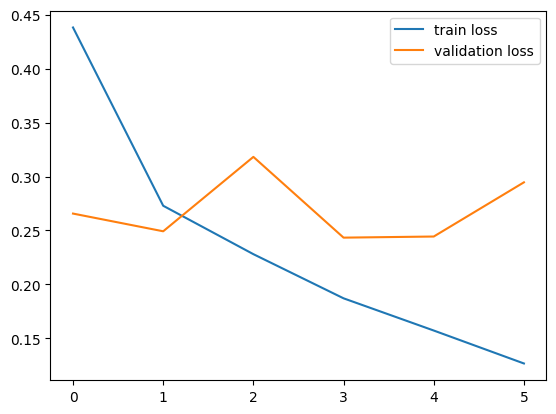

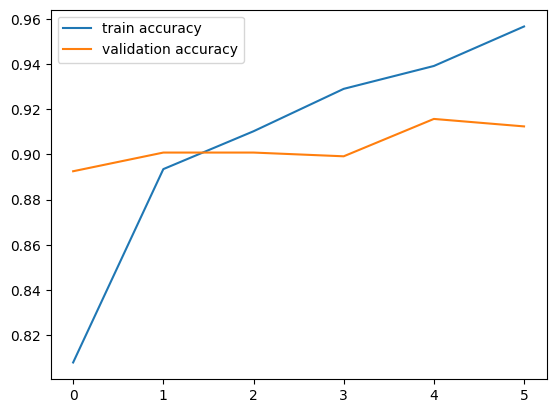

In [54]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# Predictive System

Path of image to be predicted:/content/mask_.jpeg


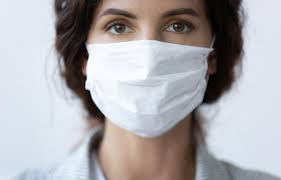

1/1 [==============================] - 0s 19ms/step
[[0.2099749 0.6718961]]
The person in the image is wearing mask


In [58]:
input_image_path=input('Path of image to be predicted:')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resized/255

input_image_reshaped=np.reshape(input_image_scaled,(1,128,128,3))

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_label=np.argmax(input_prediction)

if input_label==1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing a mask')

Path of image to be predicted:/content/without_mask.png


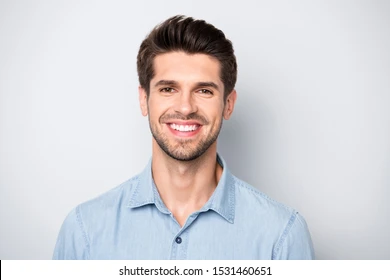

1/1 [==============================] - 0s 19ms/step
[[0.58761805 0.42249945]]
The person in the image is not wearing a mask


In [60]:
input_image_path=input('Path of image to be predicted:')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resized/255

input_image_reshaped=np.reshape(input_image_scaled,(1,128,128,3))

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_label=np.argmax(input_prediction)

if input_label==1:
  print('The person in the image is wearing mask')
else:
  print('The person in the image is not wearing a mask')